In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#랜덤포레스트

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = '/content/drive/MyDrive/loan_data.xlsx'
loan_data = pd.read_excel(file_path)

# 데이터 확인
# print(data.head())
# print(data.info())

# 독립 변수(X)와 종속 변수(y) 나누기
# 종속 변수와 독립 변수 분리
target = 'loan_status'  # 채무 이행 여부
X = loan_data.drop(columns=[target])
y = loan_data[target]


In [8]:
from sklearn.model_selection import train_test_split
# # 범주형 변수를 인코딩(true/false)
X = pd.get_dummies(X)
# print(X.columns)

# 데이터셋을 훈련 세트와 테스트 세트로 분할 (shuffle=True로 데이터 섞기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

훈련 데이터 크기: (10269, 33)
테스트 데이터 크기: (4401, 33)


In [9]:
# 훈련/테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 크기 확인
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import classification_report, roc_auc_score

# 예측
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      3483
           1       0.51      0.11      0.18       918

    accuracy                           0.79      4401
   macro avg       0.66      0.54      0.53      4401
weighted avg       0.74      0.79      0.73      4401

Random Forest AUC-ROC: 0.7062603169956534


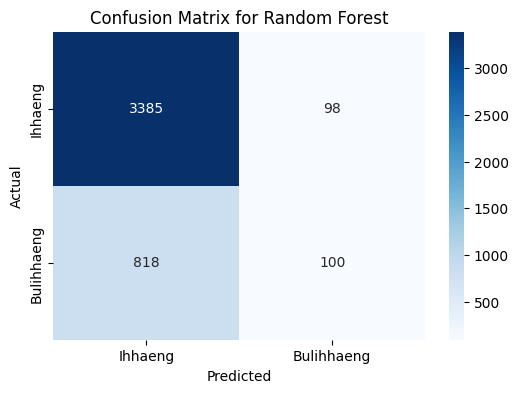

In [12]:
# 성능 평가
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
rf_auc = roc_auc_score(y_test, rf_proba)
print("Random Forest AUC-ROC:", rf_auc)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix 시각화 함수
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ihhaeng', 'Bulihhaeng'], yticklabels=['Ihhaeng', 'Bulihhaeng'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 랜덤 포레스트 Confusion Matrix
plot_confusion_matrix(y_test, rf_preds, "Random Forest")


# XGBoost


In [13]:
import pandas as pd

# 데이터 불러오기
file_path = '/content/drive/MyDrive/loan_data.xlsx'
loan_data = pd.read_excel(file_path)

# 데이터 확인
# print(data.head())
# print(data.info())

# 독립 변수(X)와 종속 변수(y) 나누기
# 종속 변수와 독립 변수 분리
target = 'loan_status'  # 채무 이행 여부
X = loan_data.drop(columns=[target])
y = loan_data[target]

from sklearn.model_selection import train_test_split
# # 범주형 변수를 인코딩(true/false)
X = pd.get_dummies(X)
# print(X.columns)

# 데이터셋을 훈련 세트와 테스트 세트로 분할 (shuffle=True로 데이터 섞기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

훈련 데이터 크기: (10269, 33)
테스트 데이터 크기: (4401, 33)


In [14]:
import xgboost as xgb
# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBClassifier(
    n_estimators=100,   # 트리의 수
    learning_rate=0.1,  # 학습률
    max_depth=6,        # 트리 깊이
    scale_pos_weight=3, # 클래스 불균형을 고려한 가중치 설정 (불이행 클래스 가중치 증가)
    random_state=42,
    eval_metric="logloss",  # 평가 지표로 로지스틱 손실 사용
    objective="binary:logistic"  # 이진 분류 모델
)

# 모델 훈련
xgb_model.fit(X_train, y_train)

# 예측
xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      3483
           1       0.37      0.53      0.43       918

    accuracy                           0.71      4401
   macro avg       0.61      0.64      0.62      4401
weighted avg       0.76      0.71      0.73      4401

XGBoost AUC-ROC: 0.7095842739430924


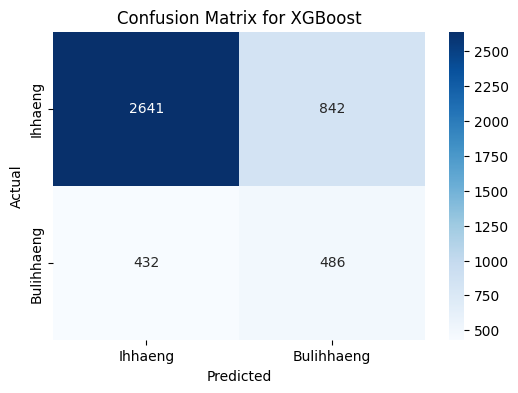

In [15]:
# 성능 평가
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))
xgb_auc = roc_auc_score(y_test, xgb_proba)
print("XGBoost AUC-ROC:", xgb_auc)

# Confusion Matrix 시각화 함수
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ihhaeng', 'Bulihhaeng'], yticklabels=['Ihhaeng', 'Bulihhaeng'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# XGBoost Confusion Matrix
plot_confusion_matrix(y_test, xgb_preds, "XGBoost")